In [70]:
import pandas as pd

In [71]:
df_train = pd.read_csv("../data/train.csv")  # 학습용 데이터
df_test = pd.read_csv("../data/submission.csv")  # 테스트 데이터(제출파일의 데이터)


In [ ]:
df_train.head()  # 학습용 데이터 살펴보기

### 결측치 확인 

In [ ]:
# 결측치 확인 
df_train.isnull()

In [ ]:
# 컬럼별 결측치 개수
df_train.isnull().sum()

In [ ]:
# 결측치 비율
(df_train.isnull().sum()/len(df_train)).round(2).sort_values(ascending=False)

In [76]:
# 수치형 데이터 
numeric_col = ["bant_submit", "com_reg_ver_win_rate", "customer_idx", 
               "historical_existing_cnt", "id_strategic_ver", "it_strategic_ver", "idit_strategic_ver", 
               "lead_desc_length", "ver_cus", "ver_pro", "ver_win_rate_x", "ver_win_ratio_per_bu", 
               "lead_owner", "is_converted"]
df_train_numeric = df_train[numeric_col]
df_train_numeric.head()

,bant_submit,com_reg_ver_win_rate,customer_idx,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,lead_desc_length,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,lead_owner,is_converted
0,1.0,0.066667,32160,NaN,NaN,NaN,NaN,62,1,0,0.003079,0.026846,0,True
1,1.0,0.066667,23122,12.0,NaN,NaN,NaN,96,1,0,0.003079,0.026846,1,True
2,1.0,0.088889,1755,144.0,NaN,NaN,NaN,56,1,0,0.003079,0.026846,2,True
3,1.0,0.088889,4919,NaN,NaN,NaN,NaN,44,1,0,0.003079,0.026846,3,True
4,1.0,0.088889,17126,NaN,NaN,NaN,NaN,97,0,0,0.003079,0.026846,4,True


In [77]:

# 범주형 데이터
categoric_col = ["customer_country","business_unit","customer_type","enterprise","customer_job",
                 "inquiry_type","product_category","product_subcategory","product_modelname",
                 "customer_country.1","customer_position","response_corporate","expected_timeline",
                 "business_area","business_subarea"]
df_train_categoric = df_train[categoric_col]
df_train_categoric.head()


,customer_country,business_unit,customer_type,enterprise,customer_job,inquiry_type,product_category,product_subcategory,product_modelname,customer_country.1,customer_position,response_corporate,expected_timeline,business_area,business_subarea
0,/Quezon City/Philippines,AS,End-Customer,Enterprise,purchasing,Quotation or purchase consultation,multi-split,NaN,NaN,/Quezon City/Philippines,entry level,LGEPH,less than 3 months,corporate / office,Engineering
1,/PH-00/Philippines,AS,End-Customer,Enterprise,media and communication,Quotation or purchase consultation,multi-split,NaN,NaN,/PH-00/Philippines,ceo/founder,LGEPH,less than 3 months,corporate / office,Advertising
2,/Kolkata /India,AS,End-Customer,Enterprise,engineering,Product Information,single-split,NaN,NaN,/Kolkata /India,partner,LGEIL,less than 3 months,corporate / office,Construction
3,/Bhubaneswar/India,AS,End-Customer,Enterprise,entrepreneurship,Quotation or purchase consultation,vrf,NaN,NaN,/Bhubaneswar/India,ceo/founder,LGEIL,less than 3 months,corporate / office,IT/Software
4,/Hyderabad/India,AS,Specifier/ Influencer,Enterprise,consulting,Quotation or purchase consultation,multi-split,NaN,NaN,/Hyderabad/India,partner,LGEIL,less than 3 months,corporate / office,NaN


In [78]:
# 각 열에 해당된 값의 종류와 개수
for column in df_train_categoric.columns:
    unique_values = df_train_categoric[column].unique()
    num_unique_values = len(unique_values)
    
    print(f"Column: {column}")
    print(f"Number of unique values: {num_unique_values}")
    print(f"Unique values: {unique_values}")
    print("\n")


Column: customer_country
Number of unique values: 15400
Unique values: ['/Quezon City/Philippines' '/PH-00/Philippines' '/Kolkata /India' ...
 '/Pisco/Peru' '/santa cruz bolivia/Peru' '/paris/France']


Column: business_unit
Number of unique values: 5
Unique values: ['AS' 'ID' 'IT' 'Solution' 'CM']


Column: customer_type
Number of unique values: 34
Unique values: ['End-Customer' 'Specifier/ Influencer' 'Service Partner'
 'Channel Partner' nan 'Corporate' 'End Customer' 'Specifier / Influencer'
 'Solution Eco-Partner' 'Distributor' 'Other' 'System Integrator'
 'Consultant' 'Installer' 'Homeowner' 'Others' 'Technician'
 'Installer/Contractor' 'Engineer' 'Manager / Director' 'Developer' 'Etc.'
 'Architect/Consultant' 'End-user' 'HVAC Engineer' 'Reseller'
 'Software/Solution Provider' 'Software / Solution Provider'
 'Dealer/Distributor' 'Technical Assistant' 'Commercial end-user'
 'Interior Designer' 'Home Owner' 'Administrator']


Column: enterprise
Number of unique values: 2
Unique valu

### 데이터 전처리
- 범주형 데이터를 숫자로 변환

In [79]:
def label_encoding(series: pd.Series) -> pd.Series:
    """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

    my_dict = {}

    # 모든 요소를 문자열로 변환
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx
    series = series.map(my_dict)

    return series


In [80]:
# 레이블 인코딩할 칼럼들
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]


for col in label_columns:
    df_train[col] = label_encoding(df_train[col])


In [81]:
# x_train, x_val, y_train, y_val = train_test_split(
#     df_train.drop("is_converted", axis=1),
#     df_train["is_converted"],
#     test_size=0.2,
#     shuffle=True,
#     random_state=400,
# )
# print(type(x_train))

### 상관 계수 계산
변수 : customer_country, com_reg_ver_win_rate, customer_type, historical_exisiting_cnt, id_strategic_ver, it_strategic_ver, idit_strategic_ver, customer_job, inquiry_type, product_category, product_subcategory, product_modelname, customer_country.1, expected_timeline, ver_win_rate_x, ver_win_ratio_per_bu, business_area, business_subarea, bant_submit, business_unit, customer_idx, enterprise, lead_desc_length, customer_position, response_corporate, ver_cus, ver_pro, lead_owner


- 숫자형 데이터를 is_converted와 상관 계수가 높은 순으로 정렬

In [82]:
# 피어슨 상관계수로 계산 (0에 가까울수록 무관)
x_train_corr = df_train_numeric.corr()
# 절대값으로 계산
x_train_corr["is_converted"].abs().sort_values(ascending=False)


is_converted               1.000000
com_reg_ver_win_rate       0.342590
lead_desc_length           0.112822
ver_win_ratio_per_bu       0.109572
lead_owner                 0.098862
ver_cus                    0.063554
customer_idx               0.056425
ver_win_rate_x             0.048552
ver_pro                    0.008846
historical_existing_cnt    0.004490
bant_submit                0.002480
id_strategic_ver                NaN
it_strategic_ver                NaN
idit_strategic_ver              NaN
Name: is_converted, dtype: float64

- 결과가 Nan으로 표현된 것
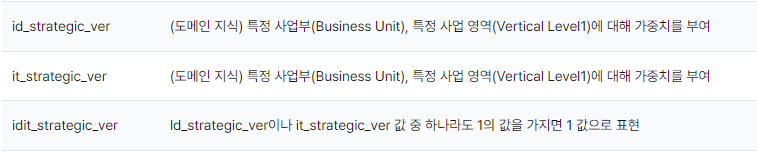

- 상관계수 Heatmap 생성

<Axes: >

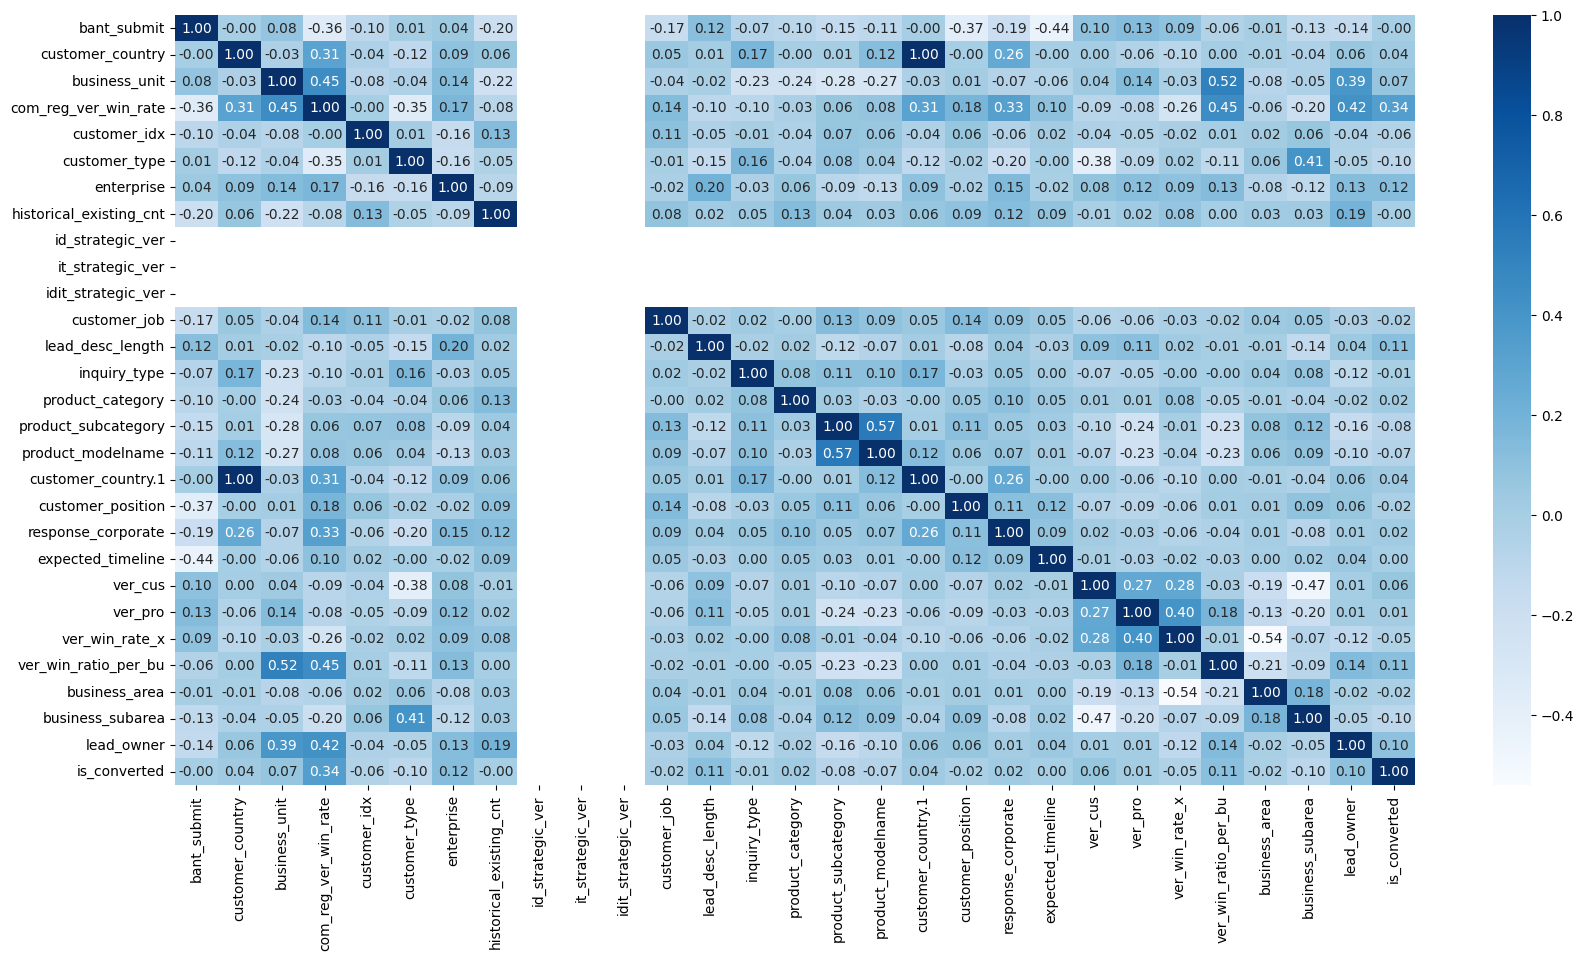

In [65]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(x_train_corr, annot=True, fmt=".2f", cmap="Blues")
